# Inferential Statistics Ib - Frequentism

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The mean and standard deviation are not very appropriate statistics to describe the distribution of this data. This is illustrated below in the histogram of medical charges, which is clearly not normally distributed. 

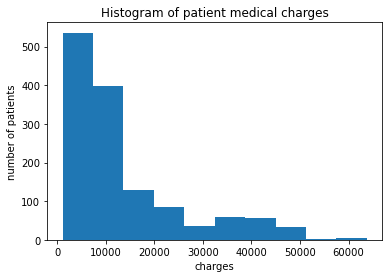

In [4]:
# Ploting histogram of medical charges.
plt.hist(medical['charges']);
plt.xlabel('charges');
plt.ylabel('number of patients');
plt.title('Histogram of patient medical charges');

In [5]:
# Calculating mean and standard deviation of charges
charges_mean = np.mean(medical['charges'])
charges_std = np.std(medical['charges'])
print('Charges mean: ',charges_mean)
print('Charges standard deviation: ',charges_std)

Charges mean:  13270.422265141257
Charges standard deviation:  12105.484975561605


__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ These data can be used to answer this question since they can be used to calculate a confidence interval for the true population mean. In other words, they can be used to establish a range of possible values of the actual average charge for a particular level of confidence. This confidence interval must be calculated using the *t* distribution since we do not know the population parameters.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ Since we only want to know if the actual average charge is below a certain value, a one-sided interval is appropriate here. The results of this test indicate that the administrator should not be concerned since the true average charge is at least 12725 (with 95% confidence).

In [6]:
# Estimate the standard deviation of the mean
std_est = np.std(medical['charges'],ddof=1)/np.sqrt(len(medical['charges']))

# Calculate the critical value
t_crit = t.ppf(0.95,df=len(medical['charges'])-1)

In [7]:
# Calculate the margin of error
me = t_crit * std_est

In [8]:
# calculate and print the minimum average charge for 95% CI
min_charge = charges_mean - me
print('Minimum average charge for 95% CI: ',min_charge)

Minimum average charge for 95% CI:  12725.48718381623


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ 


**Null hypothesis**: If patients with insurance are not charged differently than patients without insurance, then there is not a signficant difference in the average charge for patients with and without insurance.


**Alternative statement**: If patients with insurance are charged a different amount than patients without insurance, then there will be a significant difference in the average charge for patients with and without insurance. 


Note that we assuming that the variance in charge is equal for both groups.

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ The results from the 2 methods were identical, and the resultant p-values do permit the rejection of the null hypothesis.

**Manually**

In [18]:
# Select all rows for patients without insurance
x0 = medical[medical.insuranceclaim==0]['charges'].copy().values

# Select all rows for patients with insurance
x1 = medical[medical.insuranceclaim==1]['charges'].copy().values

# Get their lengths
n0 = len(x0)
n1 = len(x1)

# Calculate degrees of freedom
df = (n0+n1-2)

# Compute the means and standard deviations
x0_bar = np.mean(x0)
x1_bar = np.mean(x1)

s0 = np.std(x0)
s1 = np.std(x1)

# Compute the pooled standard deviation
sp = np.sqrt((((n0-1)*(s0**2))+((n1-1)*(s1**2)))/df)

# Calculate additional term in denominator
den_term = np.sqrt((1/n0) + (1/n1))

# Calculate t statistic
t_stat1 = (x0_bar-x1_bar)/(sp*den_term)

# Calculate the p-value
p1 = 2*t.cdf(t_stat1,df=df)

print('Probability of observation under null hypothesis: ',p1)

Probability of observation under null hypothesis:  4.090550214373679e-31


**Using scipy.stats function**

In [29]:
# Calculate using stats.ttest_ind
t_stat2,p2 = stats.ttest_ind_from_stats(x0_bar,s0,n0,x1_bar,s1,n1)
print('Probability of observation under null hypothesis: ',p2)

Probability of observation under null hypothesis:  4.090550214373679e-31


__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [30]:
# Calculate again without assuming equal variance
t_stat3,p3 = stats.ttest_ind_from_stats(x0_bar,s0,n0,x1_bar,s1,n1,equal_var=False)
print('Probability of observation under null hypothesis without assuming equal variance: ',p3)

Probability of observation under null hypothesis without assuming equal variance:  9.974516564429595e-38


__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ I am not able to recognize an equivalent function for performing a z-test from a sample, however this could be due to not fully understanding what is being asked by this question.